In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
!pip install funpymodeling
!pip install tensorflow

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from funpymodeling.exploratory import status, freq_tbl, profiling_num

dataset = pd.read_csv('/content/drive/MyDrive/ADD2021/weatherAUS.csv')

# Analisis básico de datos

**1) Visualizar las primeras filas.**

In [3]:
#visualizo las primeras filas del dataset
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataset.shape

(145460, 23)

**2) Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).**

In [5]:
#identifico el tipo de datos de cada columna y la cantidad de registros sin nulls
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#veo la cantidad de nans de cada columna, porcentaje de nans, cantidad de valores 0 que hay, y los valores unicos 
status (dataset)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.000000,0,0.000000,3436,object
1,Location,0,0.000000,0,0.000000,49,object
2,MinTemp,1485,0.010209,159,0.001093,389,float64
3,MaxTemp,1261,0.008669,14,0.000096,505,float64
4,Rainfall,3261,0.022419,91080,0.626152,681,float64
5,Evaporation,62790,0.431665,244,0.001677,358,float64
6,Sunshine,69835,0.480098,2359,0.016218,145,float64
7,WindGustDir,10326,0.070989,0,0.000000,16,object
8,WindGustSpeed,10263,0.070555,0,0.000000,67,float64
9,WindDir9am,10566,0.072639,0,0.000000,16,object


In [22]:

nans = dataset.loc[dataset.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = dataset.loc[dataset.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))


Cantidad de filas con nans (89040, 23)
Cantidad de filas sin nans (56420, 23)


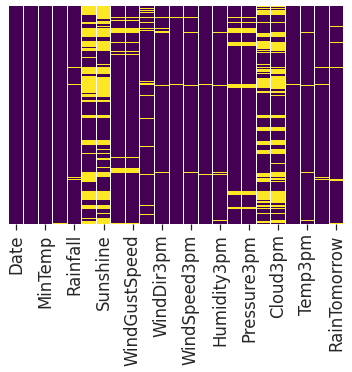

In [8]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#obtengo las estadisticas basicas de cada una de las columnas
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


***Conclusiones primer analisis***: Las variables categoricas en primera instancia son Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday.
La variable a predecir es RainTomorrow (variable de salida) y las demas variables son numericas.
Todas las variables menos la variable a predecir (RainTomorrow) son input para el modelo (variables de entrada)

 ***3) Realizar los siguientes análisis por tipo de
variable.***

**Numéricas**: Obtener conclusiones acerca de la distribución de los datos.

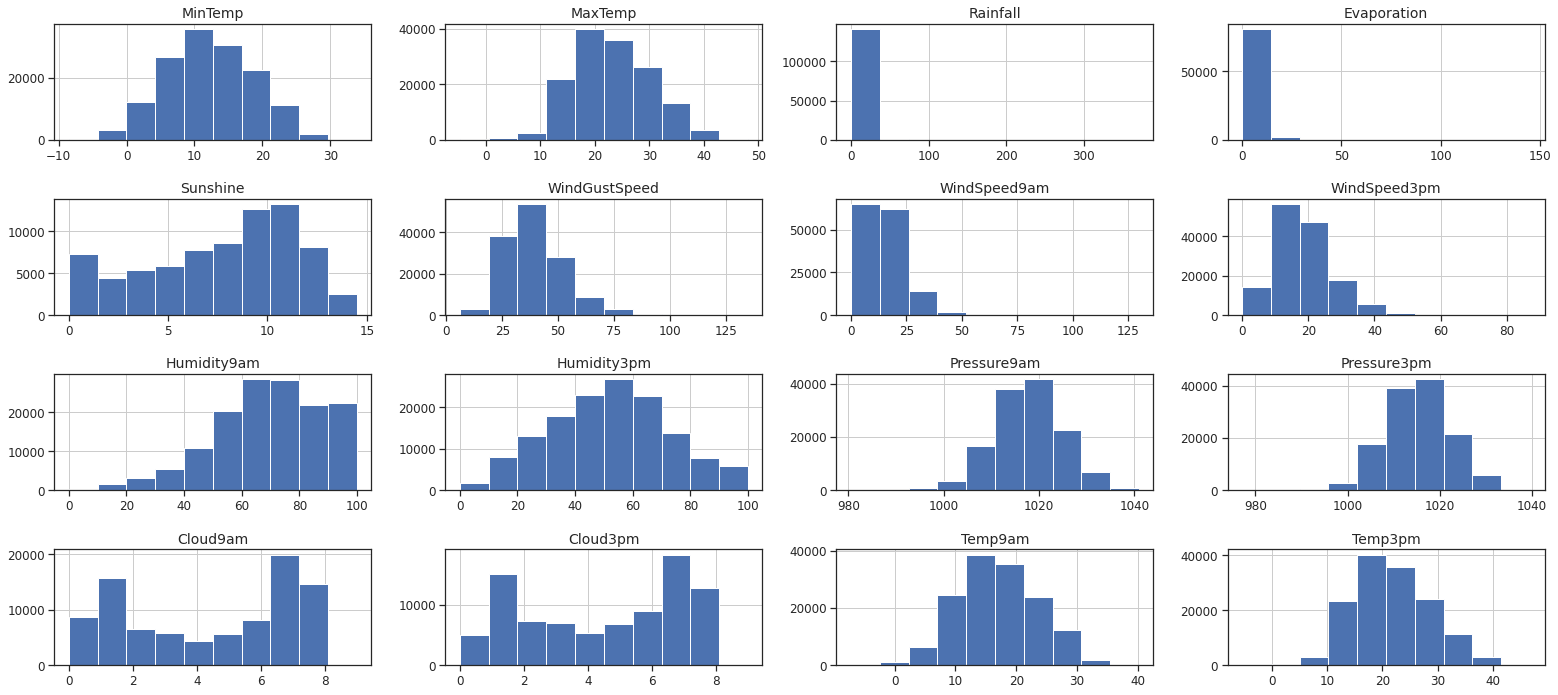

In [10]:
#Funcion para mostrar distribuciones.
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
  
#Muestro la distribucion de los datos
display_dataset_distributions(dataset)

**Categóricas**: Obtener conclusiones acerca de cardinalidad, representación de cada categoría,etc

In [11]:
dataset.Date.unique() #alta cardinalidad

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

In [12]:
dataset.Location.unique() #alta cardinalidad

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [13]:
dataset.WindGustDir.unique() # baja cardinalidad  

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [14]:
dataset.WindDir9am.unique()# baja cardinalidad

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [15]:
dataset.WindDir3pm.unique()# baja cardinalidad

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [16]:
dataset.RainToday.unique()# baja cardinalidad

array(['No', 'Yes', nan], dtype=object)

***Conclusion segundo analisis***: Se identificaron dos variables categoricas con alta cardinalidad: Date y Location. Para la variable Date se puede hacer un tratamiento ya que, ademas, se puede considerar una variable compuesta.

(array([110316.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  35144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

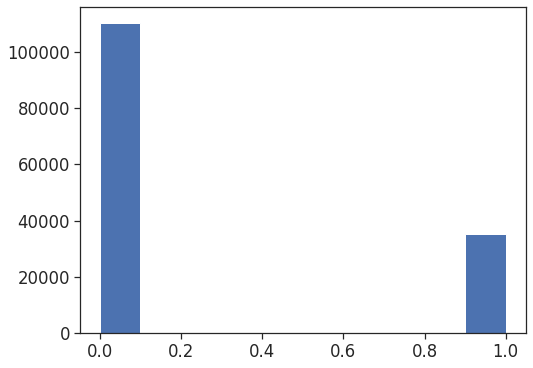

In [17]:
#veo si las clases estan balanceadas y analizo la variable de salida
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(dataset.RainTomorrow.apply(lambda label: 0 if (label == 'No') else 1))

**Conclusion**: En el analisis realizado se puede ver que las clases estan desbalanceadas.

#Pre procesamiento del dataset

In [33]:
#transformo la variable de salida para realizar un analisis de la misma y luego utilizarla en el entrenamiento
dataset['binary_rain_tomorrow'] = dataset.RainTomorrow.apply(lambda label: 0 if (label == 'No') else 1)

In [34]:
#aplico tecnica downsampling y genero un nuevo dataset
from sklearn.utils import resample
df_majority = dataset[dataset['binary_rain_tomorrow']==0]
df_minority = dataset[dataset['binary_rain_tomorrow']==1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


(array([35144.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 35144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

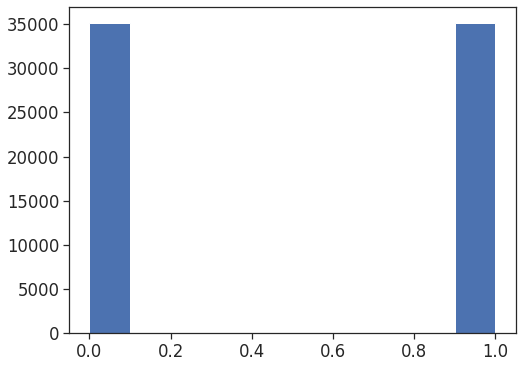

In [35]:
#analizo si las clases quedaron balanceadas
raintomorrow = df_downsampled.binary_rain_tomorrow.to_numpy()
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(raintomorrow)

In [36]:
df_downsampled.shape

(70288, 24)

# Tratamiento de NaNs



In [37]:
nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))

dataset_not_nans = not_nans

Cantidad de filas con nans (43751, 24)
Cantidad de filas sin nans (26537, 24)


In [39]:
#Tratamiento de NaNs
df_downsampled["MinTemp"]= df_downsampled["MinTemp"].fillna(df_downsampled["MinTemp"].mean())
df_downsampled["MaxTemp"]= df_downsampled["MaxTemp"].fillna(df_downsampled["MaxTemp"].mean())
df_downsampled["Evaporation"]= df_downsampled["Evaporation"].fillna(df_downsampled["Evaporation"].mean())
df_downsampled["Sunshine"]= df_downsampled["Sunshine"].fillna(df_downsampled["Sunshine"].mean())
df_downsampled["WindGustSpeed"]= df_downsampled["WindGustSpeed"].fillna(df_downsampled["WindGustSpeed"].mean())
df_downsampled["Rainfall"]= df_downsampled["Rainfall"].fillna(df_downsampled["Rainfall"].mean())
df_downsampled["WindSpeed9am"]= df_downsampled["WindSpeed9am"].fillna(df_downsampled["WindSpeed9am"].mean())
df_downsampled["WindSpeed3pm"]= df_downsampled["WindSpeed3pm"].fillna(df_downsampled["WindSpeed3pm"].mean())
df_downsampled["Humidity9am"]= df_downsampled["Humidity9am"].fillna(df_downsampled["Humidity9am"].mean())
df_downsampled["Humidity3pm"]= df_downsampled["Humidity3pm"].fillna(df_downsampled["Humidity3pm"].mean())
df_downsampled["Pressure9am"]= df_downsampled["Pressure9am"].fillna(df_downsampled["Pressure9am"].mean())
df_downsampled["Pressure3pm"]= df_downsampled["Pressure3pm"].fillna(df_downsampled["Pressure3pm"].mean())
df_downsampled["Cloud9am"]= df_downsampled["Cloud9am"].fillna(df_downsampled["Cloud9am"].mean())
df_downsampled["Cloud3pm"]= df_downsampled["Cloud3pm"].fillna(df_downsampled["Cloud3pm"].mean())
df_downsampled["Temp9am"]= df_downsampled["Temp9am"].fillna(df_downsampled["Temp9am"].mean())
df_downsampled["Temp3pm"]= df_downsampled["Temp3pm"].fillna(df_downsampled["Temp3pm"].mean())
df_downsampled['RainToday']=df_downsampled['RainToday'].fillna(df_downsampled['RainToday'].mode()[0])
df_downsampled['RainTomorrow']=df_downsampled['RainTomorrow'].fillna(df_downsampled['RainTomorrow'].mode()[0])
df_downsampled['WindDir9am'] = df_downsampled['WindDir9am'].fillna(df_downsampled['WindDir9am'].mode()[0])
df_downsampled['WindGustDir'] = df_downsampled['WindGustDir'].fillna(df_downsampled['WindGustDir'].mode()[0])
df_downsampled['WindDir3pm'] = df_downsampled['WindDir3pm'].fillna(df_downsampled['WindDir3pm'].mode()[0])

In [40]:
nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))

dataset_not_nans = not_nans

Cantidad de filas con nans (0, 24)
Cantidad de filas sin nans (70288, 24)


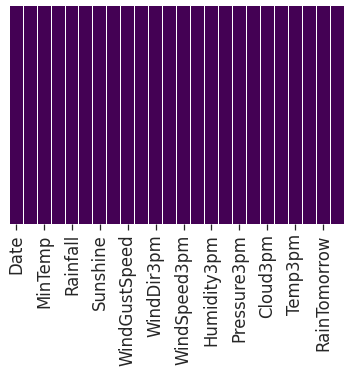

In [42]:
sns.heatmap(dataset_not_nans.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Ingeniería de features básica


In [43]:
dataset_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 39427 to 145459
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  70288 non-null  object 
 1   Location              70288 non-null  object 
 2   MinTemp               70288 non-null  float64
 3   MaxTemp               70288 non-null  float64
 4   Rainfall              70288 non-null  float64
 5   Evaporation           70288 non-null  float64
 6   Sunshine              70288 non-null  float64
 7   WindGustDir           70288 non-null  object 
 8   WindGustSpeed         70288 non-null  float64
 9   WindDir9am            70288 non-null  object 
 10  WindDir3pm            70288 non-null  object 
 11  WindSpeed9am          70288 non-null  float64
 12  WindSpeed3pm          70288 non-null  float64
 13  Humidity9am           70288 non-null  float64
 14  Humidity3pm           70288 non-null  float64
 15  Pressure9am   

In [44]:
dataset_not_nans.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,binary_rain_tomorrow
39427,2017-03-07,WaggaWagga,14.9,29.3,0.0,7.800000,6.591708,NE,41.0,ENE,SE,22.0,7.0,50.000000,20.000000,1017.7,1015.2,4.997273,5.126974,19.5,27.9,No,No,0
91344,2012-01-09,GoldCoast,23.8,31.4,0.0,5.186176,6.591708,N,44.0,N,NNE,22.0,35.0,63.000000,71.000000,1007.3,1003.2,4.997273,5.126974,27.4,28.1,No,No,0
83234,2015-05-15,Dartmoor,9.1,13.6,1.4,0.200000,2.900000,SSE,24.0,SSW,SSE,6.0,11.0,71.721595,56.957038,1038.9,1036.9,4.997273,5.126974,10.7,12.3,Yes,No,0
138239,2015-02-05,AliceSprings,15.4,33.9,0.0,13.600000,12.800000,ESE,35.0,E,E,15.0,13.0,24.000000,19.000000,1012.7,1009.6,0.000000,1.000000,26.7,32.2,No,No,0
48271,2015-06-05,Canberra,-0.8,14.0,1.0,5.186176,6.591708,NW,19.0,N,WNW,0.0,9.0,91.000000,47.000000,1020.9,1021.0,7.000000,5.126974,4.8,13.8,No,No,0


In [45]:
# remover las columnas que no vamos a usar
df = dataset_not_nans.drop(['Date','RainTomorrow'], axis=1, inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 39427 to 145459
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              70288 non-null  object 
 1   MinTemp               70288 non-null  float64
 2   MaxTemp               70288 non-null  float64
 3   Rainfall              70288 non-null  float64
 4   Evaporation           70288 non-null  float64
 5   Sunshine              70288 non-null  float64
 6   WindGustDir           70288 non-null  object 
 7   WindGustSpeed         70288 non-null  float64
 8   WindDir9am            70288 non-null  object 
 9   WindDir3pm            70288 non-null  object 
 10  WindSpeed9am          70288 non-null  float64
 11  WindSpeed3pm          70288 non-null  float64
 12  Humidity9am           70288 non-null  float64
 13  Humidity3pm           70288 non-null  float64
 14  Pressure9am           70288 non-null  float64
 15  Pressure3pm   

In [46]:
categorical_features = df.select_dtypes(include = ["object"]).columns
categorical_features


Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [47]:
# Transformo las variable categoricas utilizando one hot encoding
df = pd.get_dummies(df,columns=categorical_features,drop_first=False)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 39427 to 145459
Columns: 116 entries, MinTemp to RainToday_Yes
dtypes: float64(16), int64(1), uint8(99)
memory usage: 16.3 MB
None


In [48]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,binary_rain_tomorrow,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,...,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
39427,14.9,29.3,0.0,7.800000,6.591708,41.0,22.0,7.0,50.000000,20.000000,1017.7,1015.2,4.997273,5.126974,19.5,27.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
91344,23.8,31.4,0.0,5.186176,6.591708,44.0,22.0,35.0,63.000000,71.000000,1007.3,1003.2,4.997273,5.126974,27.4,28.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
83234,9.1,13.6,1.4,0.200000,2.900000,24.0,6.0,11.0,71.721595,56.957038,1038.9,1036.9,4.997273,5.126974,10.7,12.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
138239,15.4,33.9,0.0,13.600000,12.800000,35.0,15.0,13.0,24.000000,19.000000,1012.7,1009.6,0.000000,1.000000,26.7,32.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48271,-0.8,14.0,1.0,5.186176,6.591708,19.0,0.0,9.0,91.000000,47.000000,1020.9,1021.0,7.000000,5.126974,4.8,13.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [49]:
#escalamiento estandar- normalizacion
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

scaled = scaler.fit_transform(df) 

In [50]:
scaled

array([[ 3.74623065e-01,  9.52316306e-01, -3.36768566e-01, ...,
        -2.64073625e-01,  6.40680086e-01, -6.40680086e-01],
       [ 1.78202500e+00,  1.24944813e+00, -3.36768566e-01, ...,
        -2.64073625e-01,  6.40680086e-01, -6.40680086e-01],
       [-5.42560216e-01, -1.26909777e+00, -2.05211537e-01, ...,
        -2.64073625e-01, -1.56084140e+00,  1.56084140e+00],
       ...,
       [ 8.17401200e-01,  6.12737085e-01,  8.47244696e-01, ...,
        -2.64073625e-01, -1.56084140e+00,  1.56084140e+00],
       [ 9.59722744e-01,  8.53272367e-01,  2.91456944e+00, ...,
        -2.64073625e-01, -1.56084140e+00,  1.56084140e+00],
       [ 3.74623065e-01, -1.65883815e-14, -3.36768566e-01, ...,
        -2.64073625e-01,  6.40680086e-01, -6.40680086e-01]])

In [68]:
#PCA
from sklearn.decomposition import PCA 
  
pca_model = PCA(n_components = 2) 
pca = pca_model.fit_transform(scaled)  

In [69]:
variance=np.var(pca,axis=0)
variance_ratio = variance/np.sum(variance)
print(variance_ratio)

[0.58546931 0.41453069]


Text(0, 0.5, 'Second Principal Component')

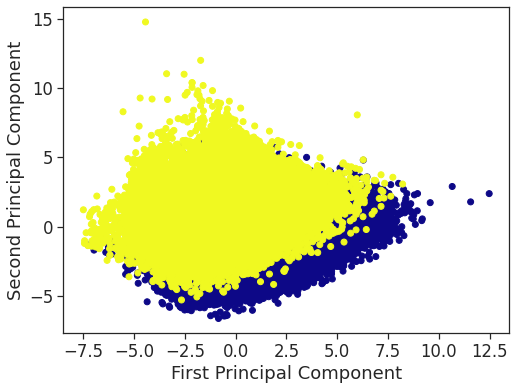

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize =(8, 6)) 
  
plt.scatter(pca[:, 0], pca[:, 1], c = df['binary_rain_tomorrow'], cmap ='plasma') 
  
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 

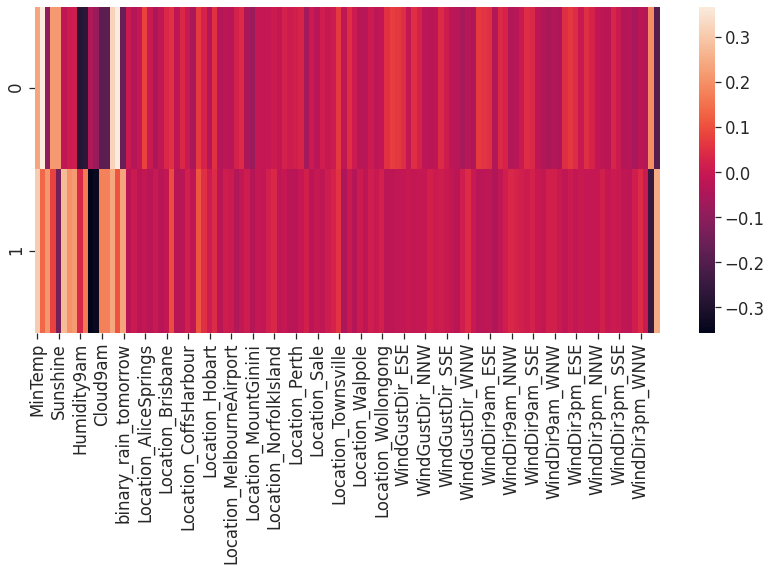

In [71]:
import seaborn as sns
df_comp = pd.DataFrame(pca_model.components_, columns = df.columns)
  
plt.figure(figsize =(14, 6)) 
  
sns.heatmap(df_comp) 

In [55]:
test = df.copy()
test = test["binary_rain_tomorrow"].values

In [57]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(pca, test, test_size = 0.25) 

In [58]:
import xgboost as xgb 
xgb = xgb.XGBClassifier() 
xgb.fit(X_train, y_train) 
y_pred = xgb.predict(X_test) 

In [59]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.464908


In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % (accuracy * 100.0))

Accuracy: 78.39
